**Importing Pkg's**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

**Defining the file paths for your datasets (training, validation & testing)**

**loading the datasets (training,testing & validation)**

**Printing the first few rows of each dataset**

**Split the training datasets into features and labels**

**Perform one-hot encoding on categorical features**

**Print the shapes of the encoded datasets**

In [2]:
# Define the categorical features (excluding the target variable)
categorical_features = ['class']
# Define the file paths for your training, validation, and testing CSV files
training_file = '/content/drive/MyDrive/_annotations(train).csv'
validation_file = '/content/drive/MyDrive/_annotations(valid).csv'
testing_file = '/content/drive/MyDrive/_annotations(test).csv'

# Load the training data
training_data = pd.read_csv(training_file)

# Load the validation data
validation_data = pd.read_csv(validation_file)

# Load the testing data
testing_data = pd.read_csv(testing_file)

# Print the first few rows of each dataset to verify the data loading
print("Training Data:")
print(training_data.head())
print()

print("Validation Data:")
print(validation_data.head())
print()

print("Testing Data:")
print(testing_data.head())
print()

# Split the training dataset into features and labels
X_train = training_data.drop('class', axis=1)
y_train = training_data['class']

# Split the validation dataset into features and labels
X_val = validation_data.drop('class', axis=1)
y_val = validation_data['class']

# Split the testing dataset into features and labels
X_test = testing_data.drop('class', axis=1)
y_test = testing_data['class']

# Perform one-hot encoding on categorical features
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)
X_test_encoded = pd.get_dummies(X_test)

# Print the shapes of the encoded datasets
print("Training set shape:", X_train_encoded.shape, y_train.shape)
print("Validation set shape:", X_val_encoded.shape, y_val.shape)
print("Testing set shape:", X_test_encoded.shape, y_test.shape)

Training Data:
                                            filename  width  height  \
0  resized_194_jpg.rf.f4cd294f6ba11ebdc92a5099eb9...   1000    1000   
1  resized_50_jpg.rf.f4e0e6ce84345e1988200e7992ab...   1000    1000   
2  resized_201_jpg.rf.f4e26abdf4612f4ba8d158e8bd5...   1000    1000   
3  resized_292_jpg.rf.f52949c4d6c03bf82eff078f5e9...   1000    1000   
4  resized_193_jpg.rf.f4ed4ffde42755ba615d0e6fbfe...   1000    1000   

            class  xmin  ymin  xmax  ymax  
0  POWDERY_MILDEW   180    74   973   967  
1       LEAFMINER   346   230   751   793  
2      FRESH_LEAF   203   414   797   813  
3      FRESH_LEAF   363   434   641   893  
4      FRESH_LEAF     0     0   377   300  

Validation Data:
                                            filename  width  height  \
0  resized_258_jpg.rf.015e45e64cfd9b4a3d3d2a9060e...   1000    1000   
1  resized_92_jpg.rf.018c18d370c5e2a49c077185d42c...   1000    1000   
2  resized_resized_87_jpg.rf.04cc210f87e0b6488fa0...   1000    

**Explore the data**

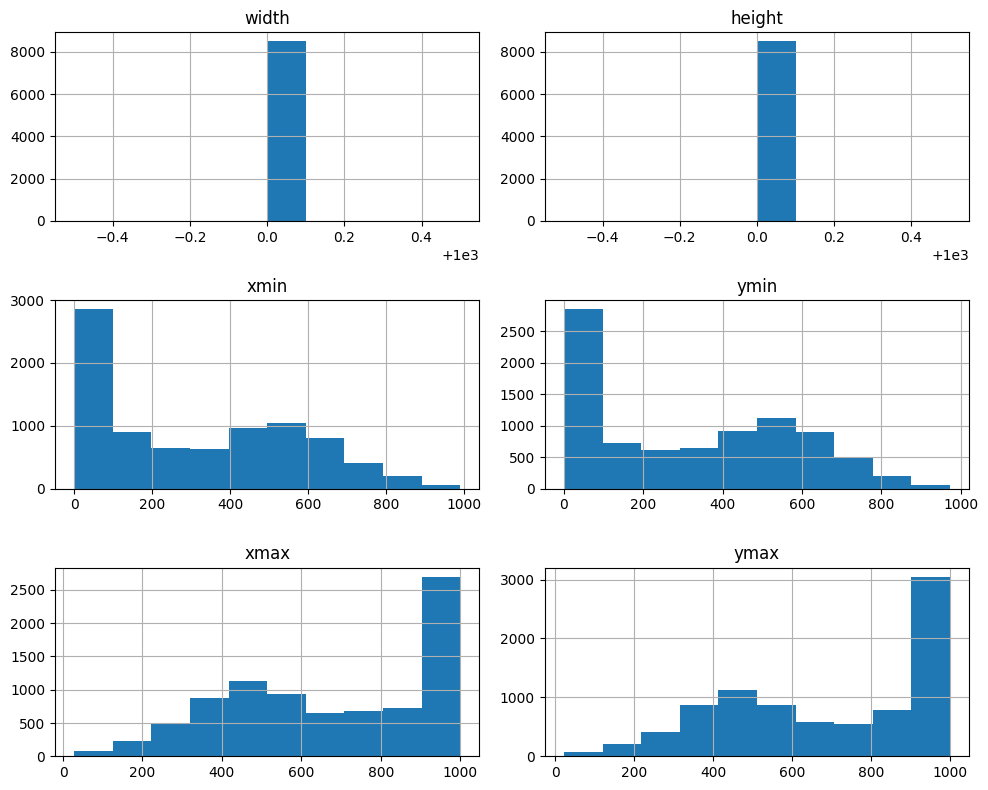

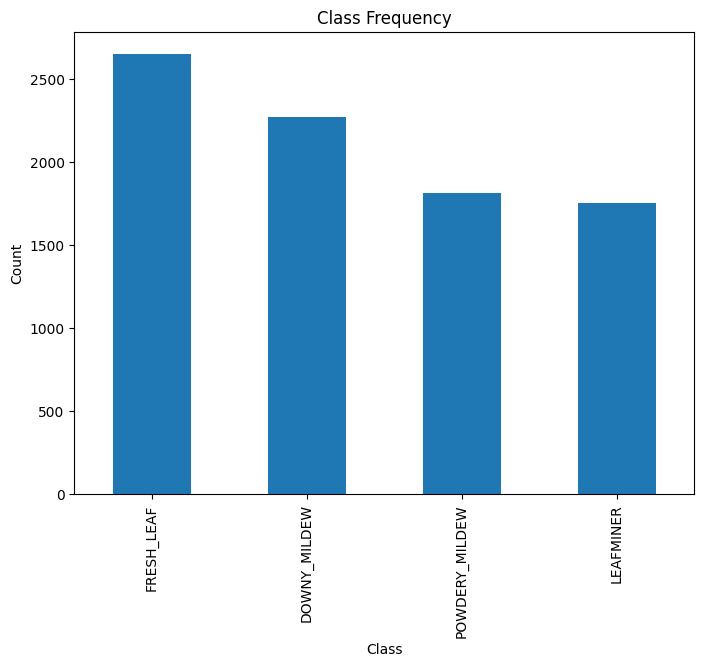

In [3]:
import matplotlib.pyplot as plt
#Explore the data

# Distribution of numerical features
numeric_features = ['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
training_data[numeric_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Frequency of categorical features
categorical_features = ['class']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    plt.title(f"{feature.capitalize()} Frequency")
    training_data[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.show()


**Exploring/showing some rows of the datasets**

In [4]:
training_data.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_194_jpg.rf.f4cd294f6ba11ebdc92a5099eb9...,1000,1000,POWDERY_MILDEW,180,74,973,967
1,resized_50_jpg.rf.f4e0e6ce84345e1988200e7992ab...,1000,1000,LEAFMINER,346,230,751,793
2,resized_201_jpg.rf.f4e26abdf4612f4ba8d158e8bd5...,1000,1000,FRESH_LEAF,203,414,797,813
3,resized_292_jpg.rf.f52949c4d6c03bf82eff078f5e9...,1000,1000,FRESH_LEAF,363,434,641,893
4,resized_193_jpg.rf.f4ed4ffde42755ba615d0e6fbfe...,1000,1000,FRESH_LEAF,0,0,377,300


In [5]:
validation_data.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_258_jpg.rf.015e45e64cfd9b4a3d3d2a9060e...,1000,1000,FRESH_LEAF,133,313,605,938
1,resized_92_jpg.rf.018c18d370c5e2a49c077185d42c...,1000,1000,FRESH_LEAF,336,305,746,938
2,resized_resized_87_jpg.rf.04cc210f87e0b6488fa0...,1000,1000,LEAFMINER,203,488,707,658
3,resized_337_jpg.rf.025e8874f82a598996874fc9010...,1000,1000,FRESH_LEAF,223,305,766,893
4,resized_resized_20_jpg.rf.01f89bf96162e91d1899...,1000,1000,LEAFMINER,516,555,582,594


In [6]:
testing_data.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_92_jpg.rf.032636ea55dfa0349f13dcba7d33...,1000,1000,DOWNY_MILDEW,191,145,617,951
1,resized_resized_158_jpg.rf.05b5bc3ce5a77c2e6ce...,1000,1000,LEAFMINER,559,430,766,588
2,resized_266_jpg.rf.063175d7bedc637af0669027092...,1000,1000,POWDERY_MILDEW,0,254,895,873
3,resized_resized_54_jpg.rf.07affce7ecfb67bf3a3e...,1000,1000,LEAFMINER,195,682,805,883
4,resized_42_jpg.rf.09b6d5a3704117e3ca4ac685d72d...,1000,1000,LEAFMINER,551,551,596,623


**Creating a Random Forest Model(classifier object)**

In [7]:
# Create a Random Forest classifier object(model)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       min_weight_fraction_leaf=0.0, max_features='auto',
                                       max_leaf_nodes=None, min_impurity_decrease=0.0,bootstrap=True,
                                       oob_score=False, n_jobs=None, random_state=None,
                                       verbose=0, warm_start=False, class_weight=None,
                                       ccp_alpha=0.0, max_samples=None)

# Fit the model on the training data
rf_model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

**Calculating the accuracy score on the test data**

In [8]:
import pandas as pd

# Assuming you have separate dataframes for training_data, validation_data, and testing_data

# Concatenate the dataframes vertically to create combined_data
combined_data = pd.concat([training_data, validation_data, testing_data], axis=0)

# Split the combined data into training, validation, and testing sets
# Rest of your code for splitting and retraining the model...


In [9]:
# Split the combined data back into training, validation, and testing sets
X_train = combined_data[:len(training_data)].drop(['class', 'filename'], axis=1)
y_train = combined_data[:len(training_data)]['class']
X_validation = combined_data[len(training_data):len(training_data)+len(validation_data)].drop(['class', 'filename'], axis=1)
y_validation = combined_data[len(training_data):len(training_data)+len(validation_data)]['class']
X_test = combined_data[len(training_data)+len(validation_data):].drop(['class', 'filename'], axis=1)
y_test = combined_data[len(training_data)+len(validation_data):]['class']


In [10]:

# Retrain the RandomForestClassifier using the original feature names
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Calculate the accuracy score on the test data
score = rf_model.score(X_test, y_test)
print("Accuracy score on the test data: {:.2f}".format(score))


Accuracy score on the test data: 0.63


**Make predictions on the Validation_data & Testing_data**

In [11]:
# Make predictions on the validation data
val_predictions = rf_model.predict(X_validation)

# Make predictions on the testing data
test_predictions = rf_model.predict(X_test)


**Calculating the accuracy of the model on the Validation_data & Testing_data**

**Generating a classification report for the Validation_data & Testing_data**

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y_validation, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Generate a classification report for the validation data
val_report = classification_report(y_validation, val_predictions)
print("Validation Report:")
print(val_report)

# Calculate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

# Generate a classification report for the testing data
test_report = classification_report(y_test, test_predictions)
print("Testing Report:")
print(test_report)


Validation Accuracy: 0.6111111111111112
Validation Report:
                precision    recall  f1-score   support

  DOWNY_MILDEW       0.52      0.43      0.47        82
    FRESH_LEAF       0.50      0.65      0.57        78
     LEAFMINER       0.76      0.83      0.79       109
POWDERY_MILDEW       0.59      0.48      0.53        91

      accuracy                           0.61       360
     macro avg       0.60      0.60      0.59       360
  weighted avg       0.61      0.61      0.61       360

Testing Accuracy: 0.6303030303030303
Testing Report:
                precision    recall  f1-score   support

  DOWNY_MILDEW       0.61      0.41      0.49        49
    FRESH_LEAF       0.50      0.78      0.61        40
     LEAFMINER       0.85      0.75      0.80        44
POWDERY_MILDEW       0.65      0.62      0.63        32

      accuracy                           0.63       165
     macro avg       0.65      0.64      0.63       165
  weighted avg       0.65      0.63      0.

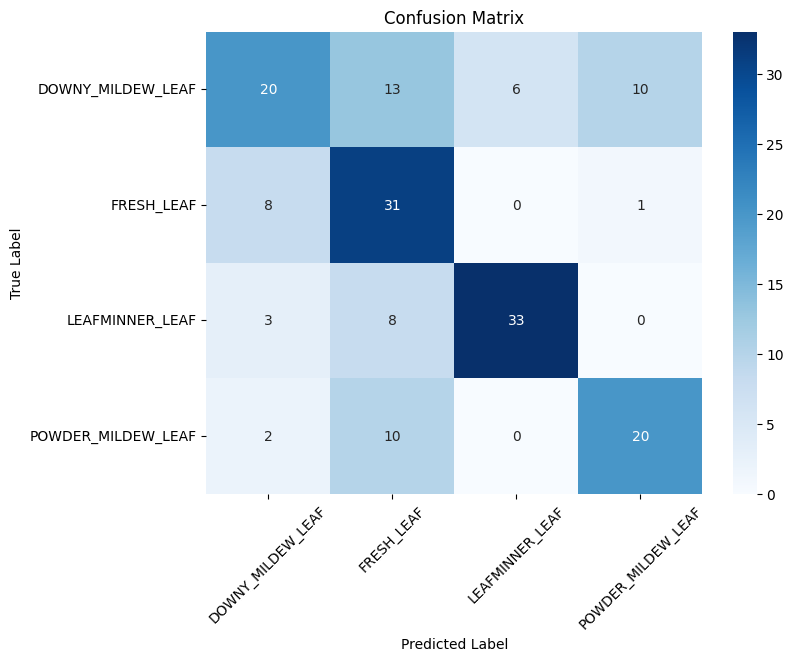

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['DOWNY_MILDEW_LEAF', 'FRESH_LEAF', 'LEAFMINNER_LEAF', 'POWDER_MILDEW_LEAF']

# Evaluate the model
test_accuracy = rf_model.score(X_test, y_test)
test_report = classification_report(y_test, test_predictions, target_names=class_names)
confusion_mat = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)
plt.show()


Training Accuracy: 0.9977641798070134
Testing Accuracy: 0.6303030303030303


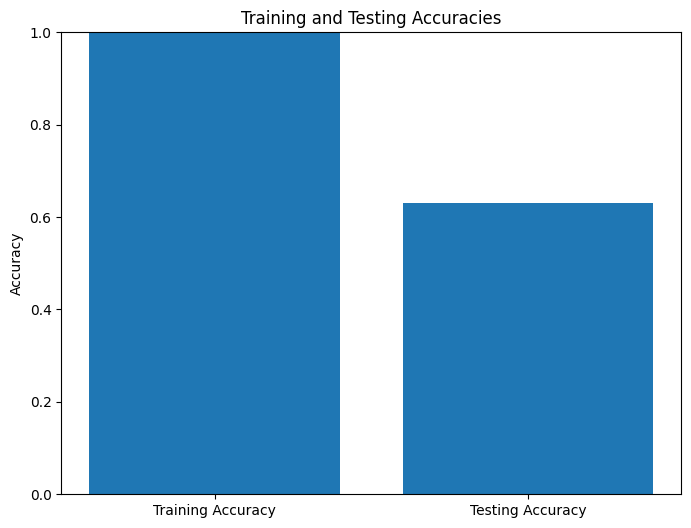

In [14]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate the training and testing accuracies
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot training and testing accuracies
plt.figure(figsize=(8, 6))
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]
plt.bar(labels, values)
plt.title('Training and Testing Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()


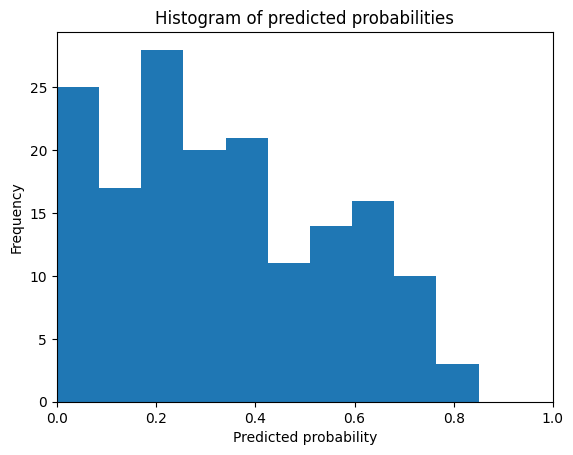

In [16]:
import matplotlib.pyplot as plt

# Assuming you have a trained RandomForestClassifier model called rf_model

# Obtain predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test)

# Plot the histogram of predicted probabilities for class 1
plt.hist(y_pred_prob[:, 1], bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()


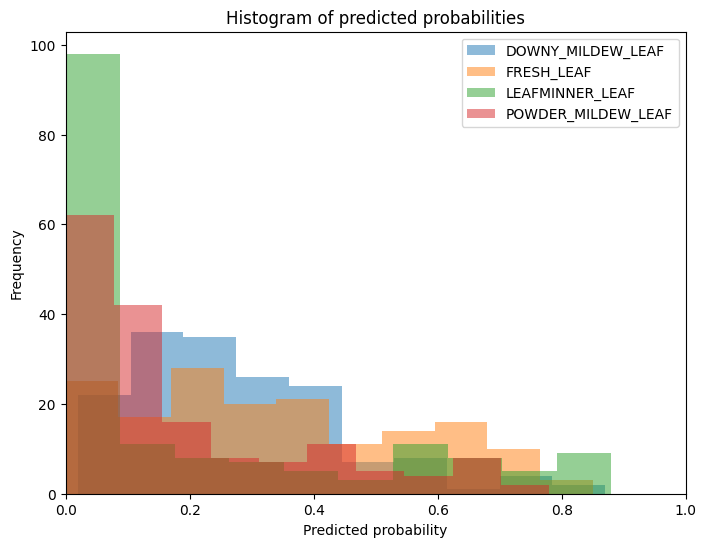

In [18]:
import matplotlib.pyplot as plt

class_names = ['DOWNY_MILDEW_LEAF', 'FRESH_LEAF', 'LEAFMINNER_LEAF', 'POWDER_MILDEW_LEAF']

# Assuming you have a trained RandomForestClassifier model called rf_model

# Obtain predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test)

# Plot the histogram of predicted probabilities for each class
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    plt.hist(y_pred_prob[:, i], bins=10, alpha=0.5, label=class_names[i])

plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


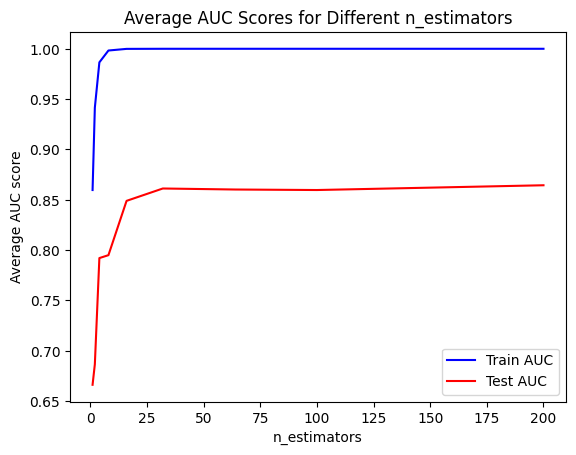

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the file paths for your training, validation, and testing CSV files
training_file = '/content/drive/MyDrive/_annotations(train).csv'
validation_file = '/content/drive/MyDrive/_annotations(valid).csv'
testing_file = '/content/drive/MyDrive/_annotations(test).csv'

# Load the training data
training_data = pd.read_csv(training_file)

# Load the validation data
validation_data = pd.read_csv(validation_file)

# Load the testing data
testing_data = pd.read_csv(testing_file)

# Combine training, validation, and testing data for label encoding
combined_data = pd.concat([training_data, validation_data, testing_data])

# Encode categorical features
label_encoder = LabelEncoder()
combined_data['filename_encoded'] = label_encoder.fit_transform(combined_data['filename'])
combined_data['class_encoded'] = label_encoder.fit_transform(combined_data['class'])

# Split the combined data back into training, validation, and testing sets
X_train = combined_data[:len(training_data)].drop(['class', 'class_encoded', 'filename'], axis=1)
y_train = combined_data[:len(training_data)]['class_encoded']
X_validation = combined_data[len(training_data):len(training_data)+len(validation_data)].drop(['class', 'class_encoded', 'filename'], axis=1)
y_validation = combined_data[len(training_data):len(training_data)+len(validation_data)]['class_encoded']
X_test = combined_data[len(training_data)+len(validation_data):].drop(['class', 'class_encoded', 'filename'], axis=1)
y_test = combined_data[len(training_data)+len(validation_data):]['class_encoded']

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_auc_scores = []
test_auc_scores = []

for estimator in n_estimators:
    rf_model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)

    # Perform one-vs-rest classification for each class
    train_auc = []
    test_auc = []
    for class_label in np.unique(y_train):
        # Create a binary target variable
        y_train_binary = (y_train == class_label).astype(int)
        y_test_binary = (y_test == class_label).astype(int)

        # Fit the random forest classifier and make predictions
        rf_model.fit(X_train, y_train_binary)
        train_predictions = rf_model.predict_proba(X_train)[:, 1]
        test_predictions = rf_model.predict_proba(X_test)[:, 1]

        # Compute the ROC curve and AUC score for the binary classification
        fpr_train, tpr_train, _ = roc_curve(y_train_binary, train_predictions)
        fpr_test, tpr_test, _ = roc_curve(y_test_binary, test_predictions)
        auc_train = auc(fpr_train, tpr_train)
        auc_test = auc(fpr_test, tpr_test)

        train_auc.append(auc_train)
        test_auc.append(auc_test)

    train_auc_scores.append(np.mean(train_auc))
    test_auc_scores.append(np.mean(test_auc))

# Plot the average AUC scores for training and testing
plt.plot(n_estimators, train_auc_scores, 'b', label='Train AUC')
plt.plot(n_estimators, test_auc_scores, 'r', label='Test AUC')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Average AUC score')
plt.title('Average AUC Scores for Different n_estimators')
plt.show()
